In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/.DS_Store
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/example_test_files/test_proteins.csv
/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv
/Users/habib

In [24]:
train_proteins = pd.read_csv('/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/train_proteins.csv')

In [25]:
train_proteins.head()


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [26]:
train_proteins['patient_id'].nunique()


248

In [27]:
train_proteins.groupby('patient_id')['visit_id'].count().sort_values(ascending=False)


patient_id
62723    1929
20404    1924
23391    1919
26210    1912
18183    1899
         ... 
55240     429
42086     427
25911     419
52119     417
41930     199
Name: visit_id, Length: 248, dtype: int64

In [28]:
train_proteins['visit_id'].nunique()

1113

In [29]:
train_proteins['UniProt'].nunique()


227

In [30]:
train_proteins[train_proteins['patient_id'] == 55]

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
143003,55_36,36,55,Q9UHG2,377550.0
143004,55_36,36,55,Q9UKV8,74976.1
143005,55_36,36,55,Q9UNU6,31732.6
143006,55_36,36,55,Q9Y646,22186.5


<AxesSubplot:xlabel='NPX'>

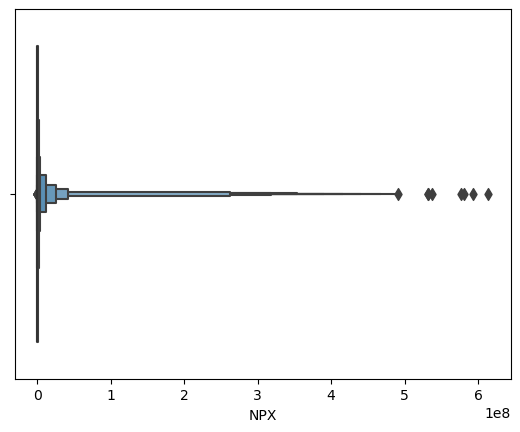

In [31]:
sns.boxenplot(train_proteins['NPX'])

In [32]:
train_proteins[train_proteins['patient_id'] == 55]['UniProt'].nunique()


226

In [33]:
train_proteins['visit_month'].unique()

array([  0,   3,   6,  12,  18,  24,  30,  36,  48,  54,  60,  72,  84,
        96, 108])

In [34]:
train_proteins['visit_month'].value_counts()


0      40587
12     37467
24     36225
36     31156
48     28838
6      25991
60     17572
84      6288
72      4407
18      1657
108      855
3        641
96       423
54       418
30       216
Name: visit_month, dtype: int64

In [35]:
train_proteins['UniProt'].nunique()


227

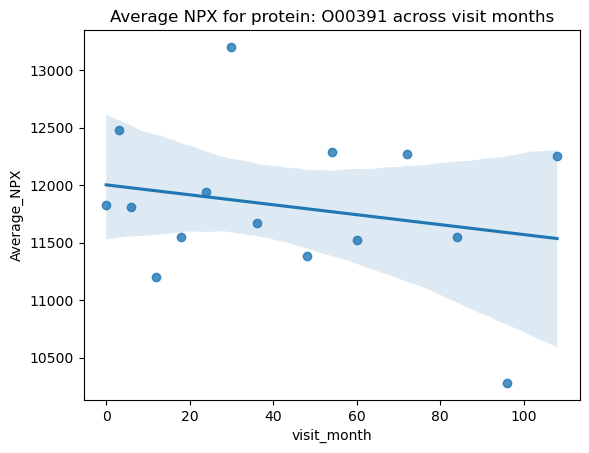

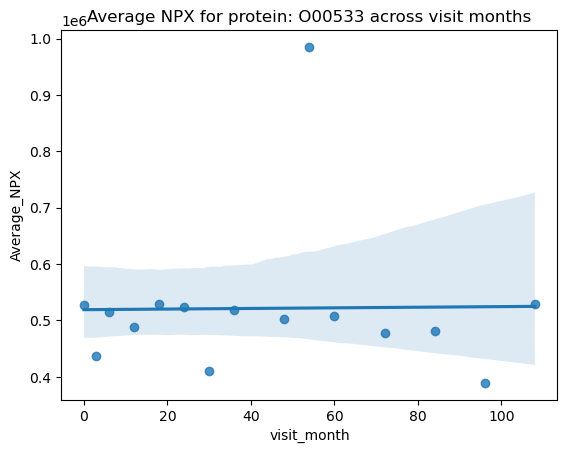

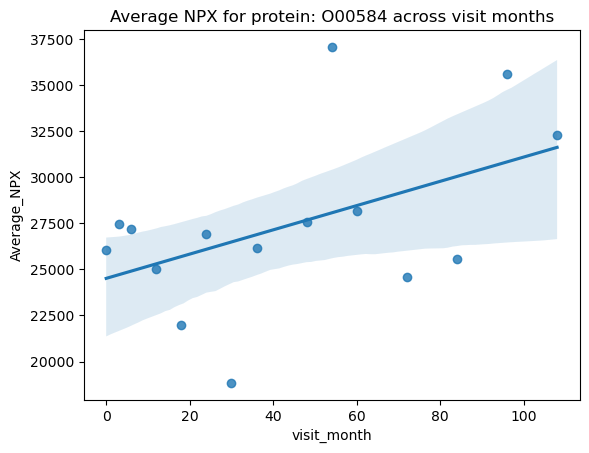

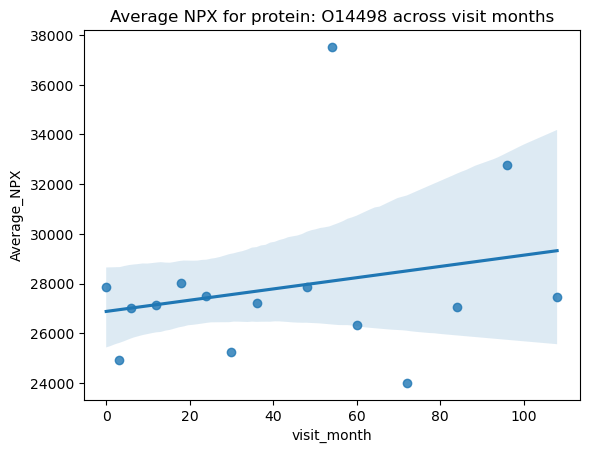

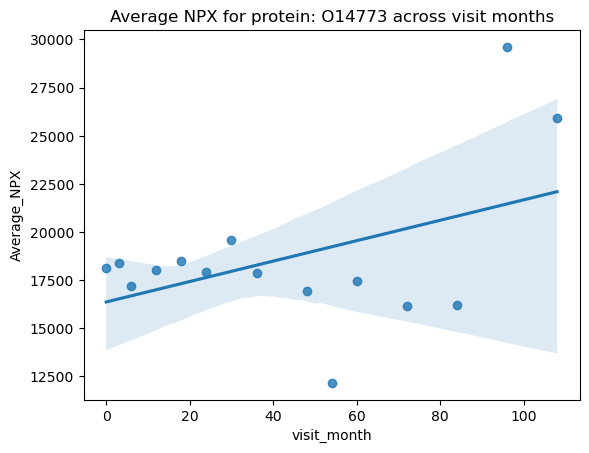

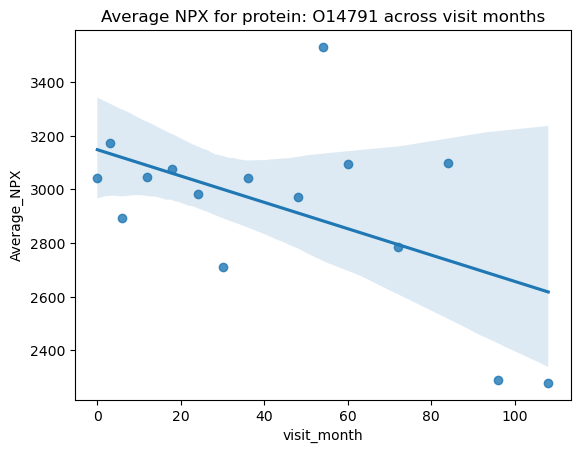

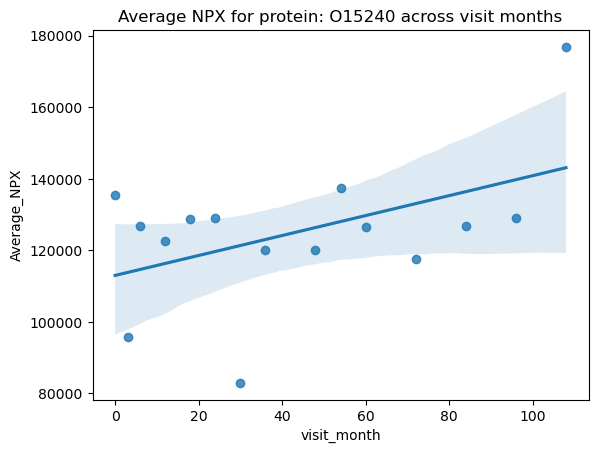

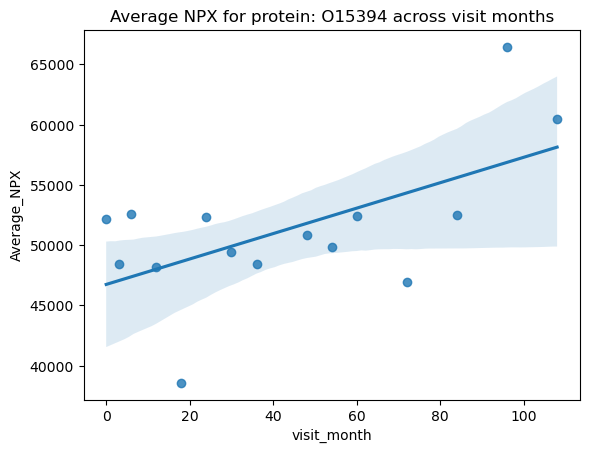

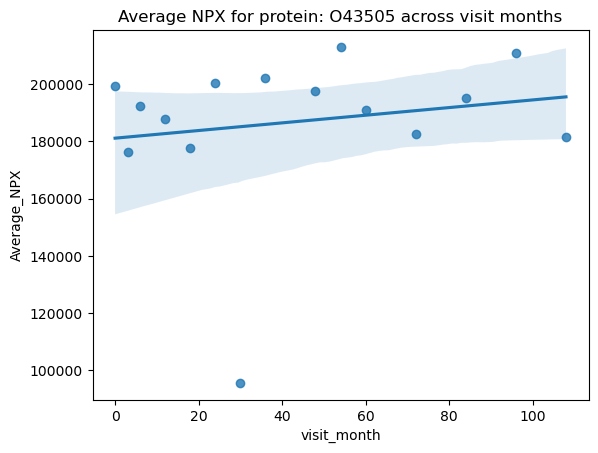

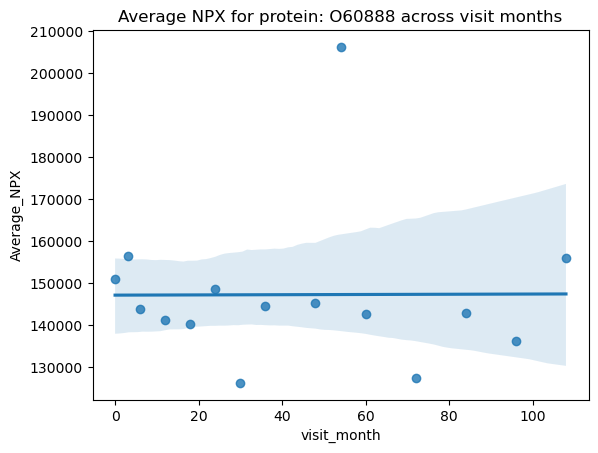

In [36]:
for prot in train_proteins['UniProt'].unique()[:10]:
    df = train_proteins[train_proteins['UniProt'] == prot]
    df_1 = df.groupby('visit_month')['NPX'].mean().reset_index()
    df_1.columns = ['visit_month', 'Average_NPX']
    sns.regplot(data = df_1, x = 'visit_month', y = 'Average_NPX')
    plt.title('Average NPX for protein: {} across visit months'.format(prot))
    plt.show()

In [38]:
train_peptides = pd.read_csv('/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/train_peptides.csv')

In [39]:
train_peptides.head(2)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0


In [40]:
train_peptides['Peptide'].nunique()


968

<AxesSubplot:ylabel='Density'>

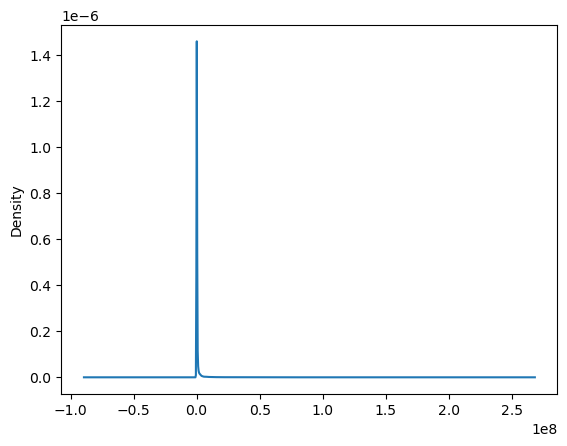

In [41]:
train_peptides['PeptideAbundance'].plot(kind='kde')


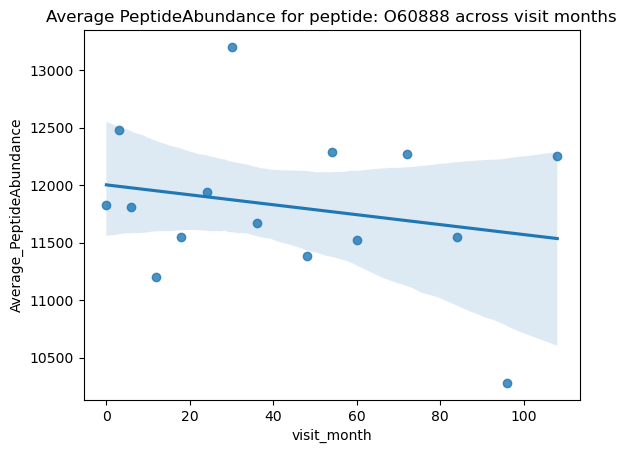

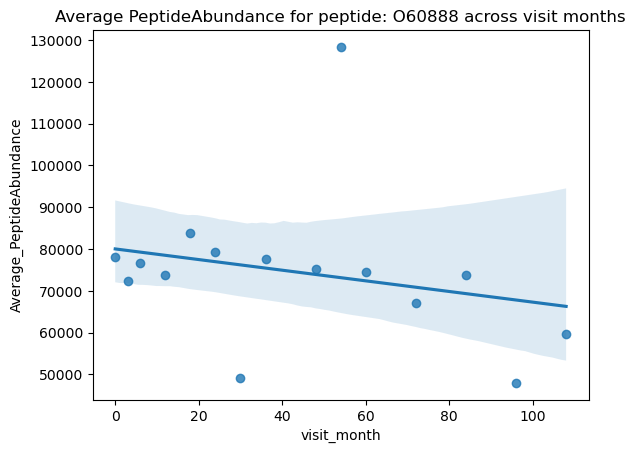

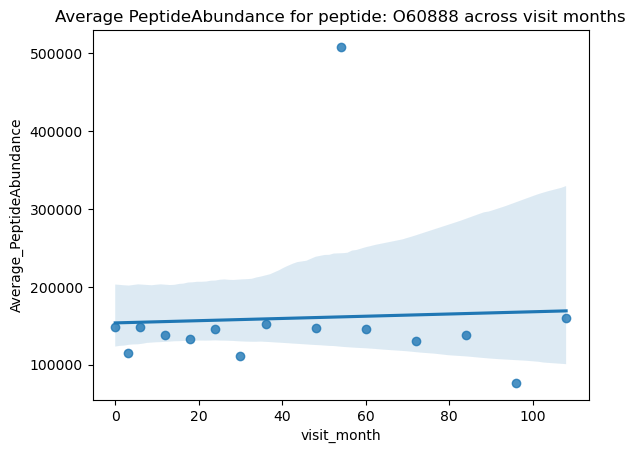

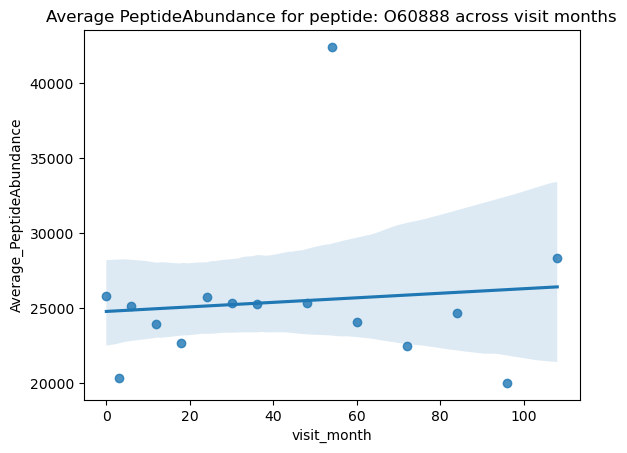

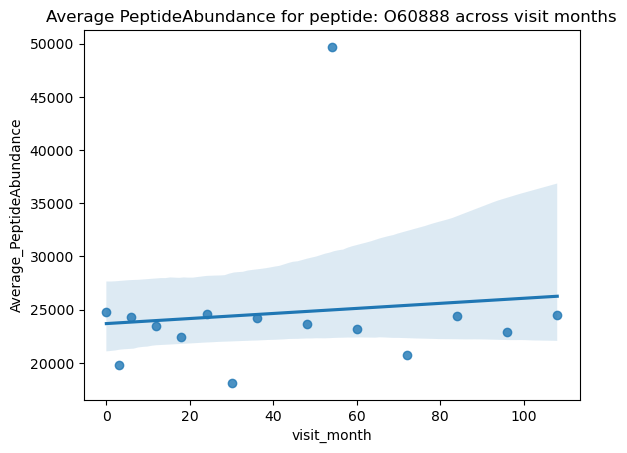

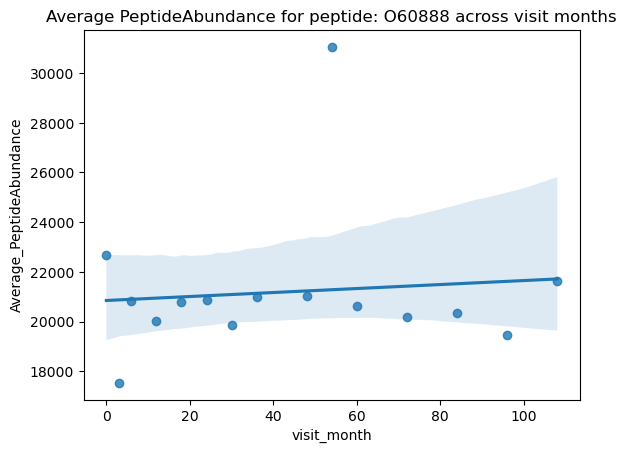

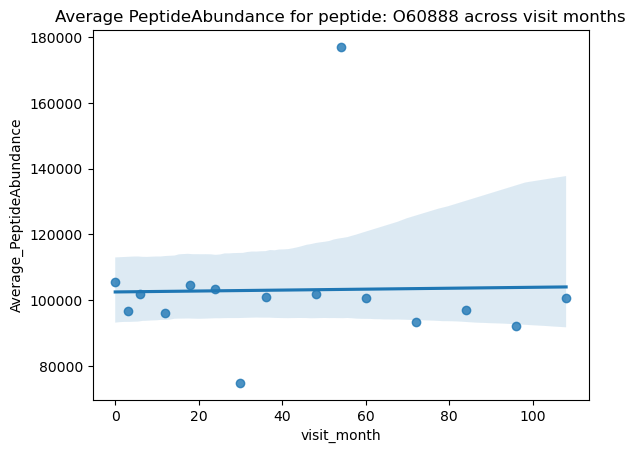

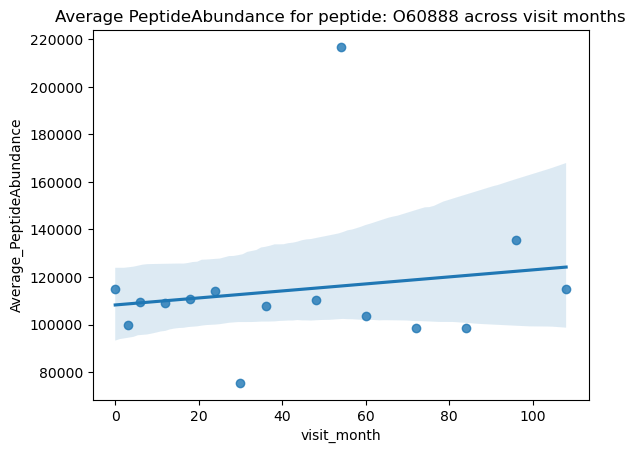

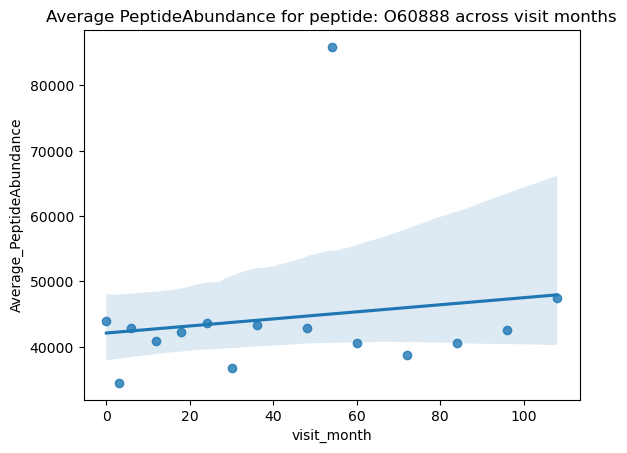

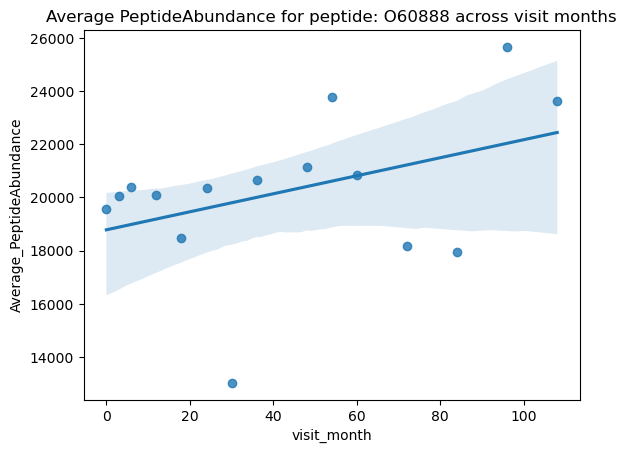

In [42]:
for peptide in train_peptides['Peptide'].unique()[:10]:
    df = train_peptides[train_peptides['Peptide'] == peptide]
    df_1 = df.groupby('visit_month')['PeptideAbundance'].mean().reset_index()
    df_1.columns = ['visit_month', 'Average_PeptideAbundance']
    sns.regplot(data = df_1, x = 'visit_month', y = 'Average_PeptideAbundance')
    plt.title('Average PeptideAbundance for peptide: {} across visit months'.format(prot))
    plt.show()

In [43]:
train_clinical_data = pd.read_csv('/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv')

In [44]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


In [45]:
train_clinical_data['patient_id'].nunique()


248

In [46]:
train_clinical_data.groupby('patient_id')['visit_month'].nunique().sort_values(ascending=False)

patient_id
55096    17
57108    17
15009    17
16778    16
52266    16
         ..
13968     5
20792     5
62732     4
60443     3
14450     3
Name: visit_month, Length: 248, dtype: int64

In [47]:
train_clinical_data[train_clinical_data['patient_id'] == 55096]['visit_month'].min()


0

In [48]:
train_clinical_data[train_clinical_data['patient_id'] == 55096]['visit_month'].max()


108

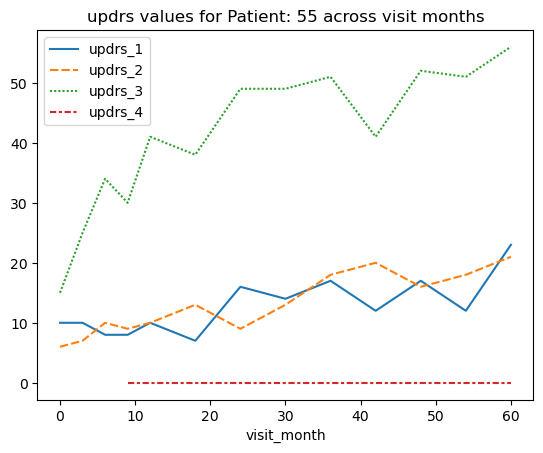

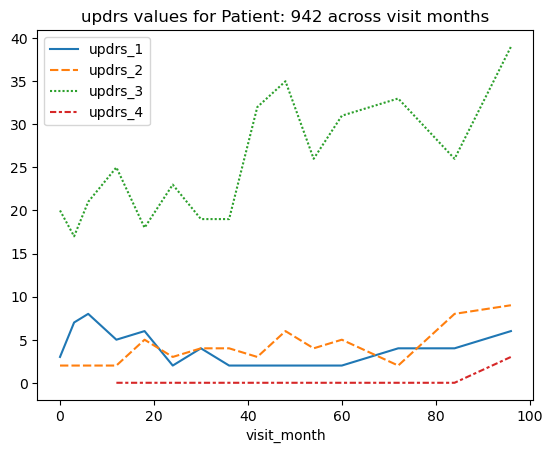

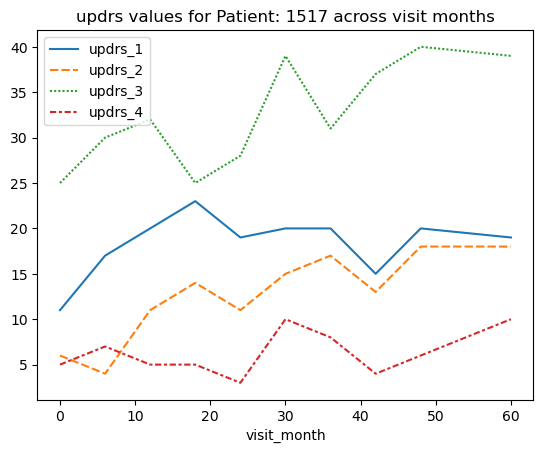

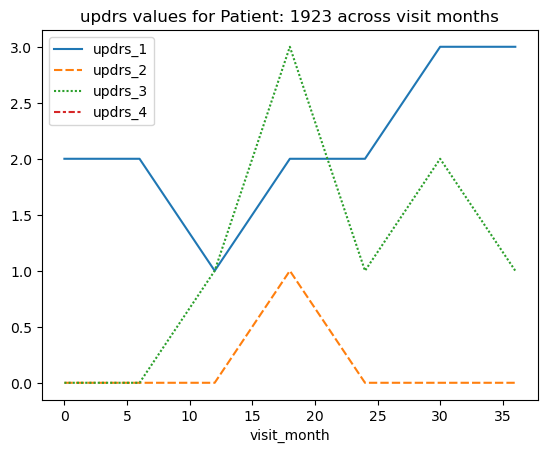

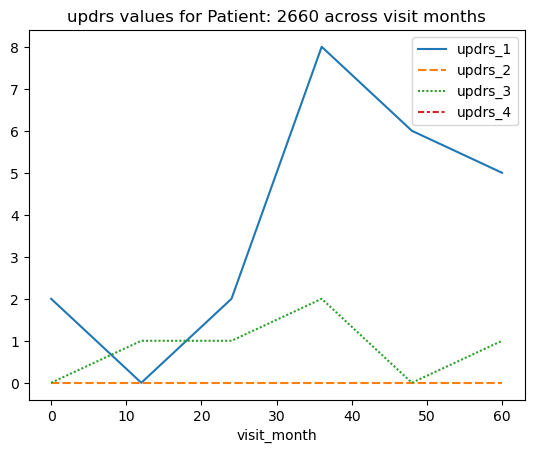

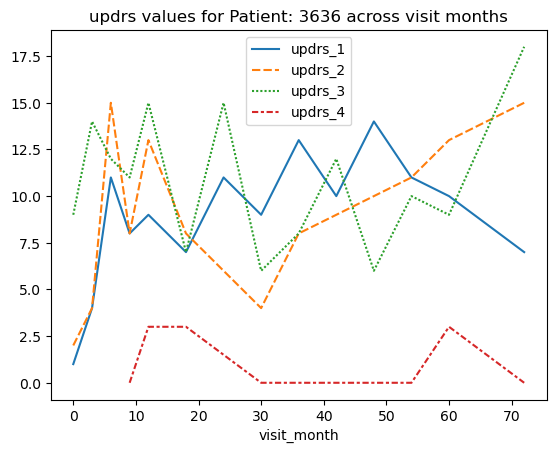

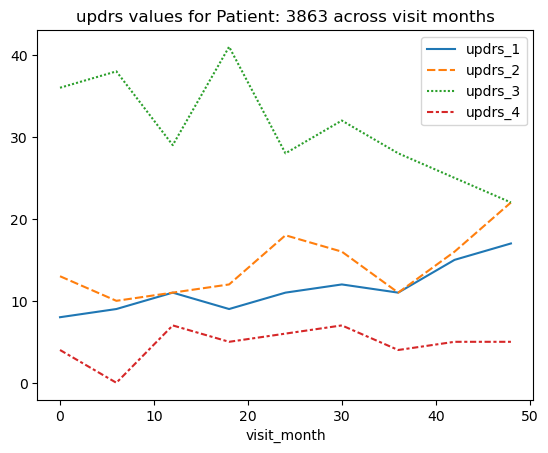

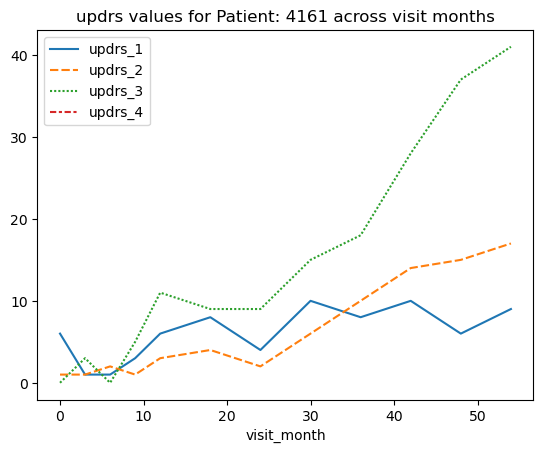

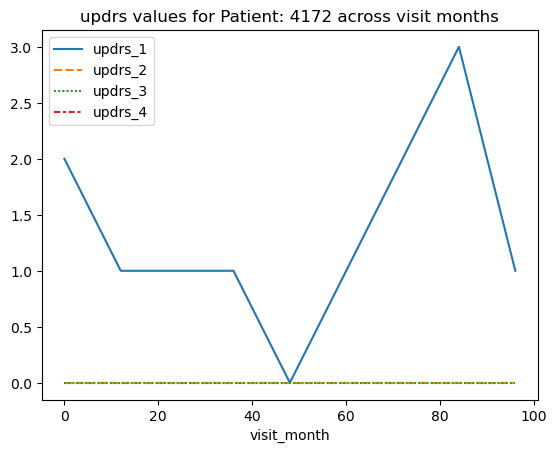

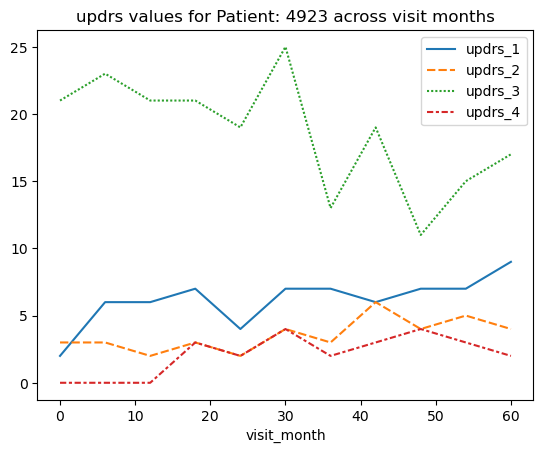

In [49]:
for patient in train_clinical_data['patient_id'].unique()[:10]:
    df = train_clinical_data[train_clinical_data['patient_id'] == patient]
    df = df[['visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]
    df = df.set_index('visit_month')
    sns.lineplot(data = df)
    plt.title('updrs values for Patient: {} across visit months'.format(patient))
    plt.show()

In [50]:
train_clinical_data['upd23b_clinical_state_on_medication'].value_counts()


On     775
Off    513
Name: upd23b_clinical_state_on_medication, dtype: int64

In [52]:
supplemental_clinical_data = pd.read_csv('/Users/habibi/Downloads/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')


In [53]:
supplemental_clinical_data.shape


(2223, 8)

In [54]:
supplemental_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN


In [55]:
supplemental_clinical_data.groupby('upd23b_clinical_state_on_medication')['updrs_3'].mean()


upd23b_clinical_state_on_medication
Off     2.793103
On     22.275641
Name: updrs_3, dtype: float64

In [56]:
supplemental_clinical_data.groupby('upd23b_clinical_state_on_medication')['updrs_1'].mean()


upd23b_clinical_state_on_medication
Off    3.379310
On     5.741995
Name: updrs_1, dtype: float64

In [57]:
supplemental_clinical_data.groupby('upd23b_clinical_state_on_medication')['updrs_4'].mean()


upd23b_clinical_state_on_medication
Off         NaN
On     0.642247
Name: updrs_4, dtype: float64

# Merge the data and perform feature engineering¶


In [58]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


In [59]:
train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()


,updrs_1,updrs_2,updrs_3,updrs_4
updrs_1,1.000000,0.661802,0.434569,0.432620
updrs_2,0.661802,1.000000,0.735106,0.383866
updrs_3,0.434569,0.735106,1.000000,0.221593
updrs_4,0.432620,0.383866,0.221593,1.000000


In [60]:
train_proteins.head(2)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0


In [61]:
train_proteins.shape


(232741, 5)

In [62]:
train_peptides.head(2)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0


In [63]:
train_peptides.shape


(981834, 6)

In [64]:
train_data = pd.merge(train_proteins, train_peptides, on=['patient_id', 'visit_month', 'UniProt'], how='outer')

In [65]:
train_data.shape


(981834, 8)

In [66]:
train_data.head(2)


,visit_id_x,visit_month,patient_id,UniProt,NPX,visit_id_y,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,55_0,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,732430.0,55_0,GNPEPTFSWTK,102060.0


In [67]:
(train_data['visit_id_x'] != train_data['visit_id_y']).sum()


0

In [68]:
train_data = train_data.drop(columns = ['visit_id_y'])


In [69]:
train_data.head(2)


,visit_id_x,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0


In [70]:
train_data = train_data.rename(columns = {'visit_id_x': 'visit_id'})


In [71]:
train_data.head(2)


,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0


In [72]:
train_data = pd.merge(train_data, train_clinical_data, on=['visit_month', 'patient_id'], how='outer')

In [73]:
train_data.head(2)


,visit_id_x,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,visit_id_y,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,55_0,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,55_0,10.0,6.0,15.0,NaN,NaN


In [74]:
train_data = train_data.drop(columns = ['visit_id_y'])
train_data = train_data.rename(columns = {'visit_id_x': 'visit_id'})

In [75]:
train_data.head(2)


,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,NaN,NaN


In [76]:
train_data.shape


(983381, 12)

Null values for different type of updrs

In [77]:
train_data['updrs_1'].isna().sum(), train_data['updrs_2'].isna().sum(), train_data['updrs_3'].isna().sum(), train_data['updrs_4'].isna().sum()

(40091, 40092, 49225, 486843)

In [78]:
train_data['UniProt'].isna().sum()


1547

In [79]:
train_data['NPX'].isna().sum()


1547

In [80]:
supplemental_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN


In [81]:
supplemental_clinical_data.shape


(2223, 8)

In [82]:
train_proteins['UniProt'].isna().sum()


0

In [83]:
train_proteins['NPX'].isna().sum()


0

In [84]:
train_peptides['PeptideAbundance'].isna().sum()


0

In [85]:
train_peptides['Peptide'].isna().sum()


0

In [86]:
train_data.head(2)


,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,NaN,NaN


In [87]:
train_data['visit_month'].isna().sum()


0

In [88]:
train_data['visit_month'].value_counts().sort_values(ascending=False)


0      171102
12     158177
24     152106
36     130982
48     121402
6      110840
60      74644
84      26799
72      18714
18       7001
108      3640
3        2856
54       1909
96       1871
30       1085
42        154
9          99
Name: visit_month, dtype: int64

In [89]:
train_clinical_data.head(2)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN


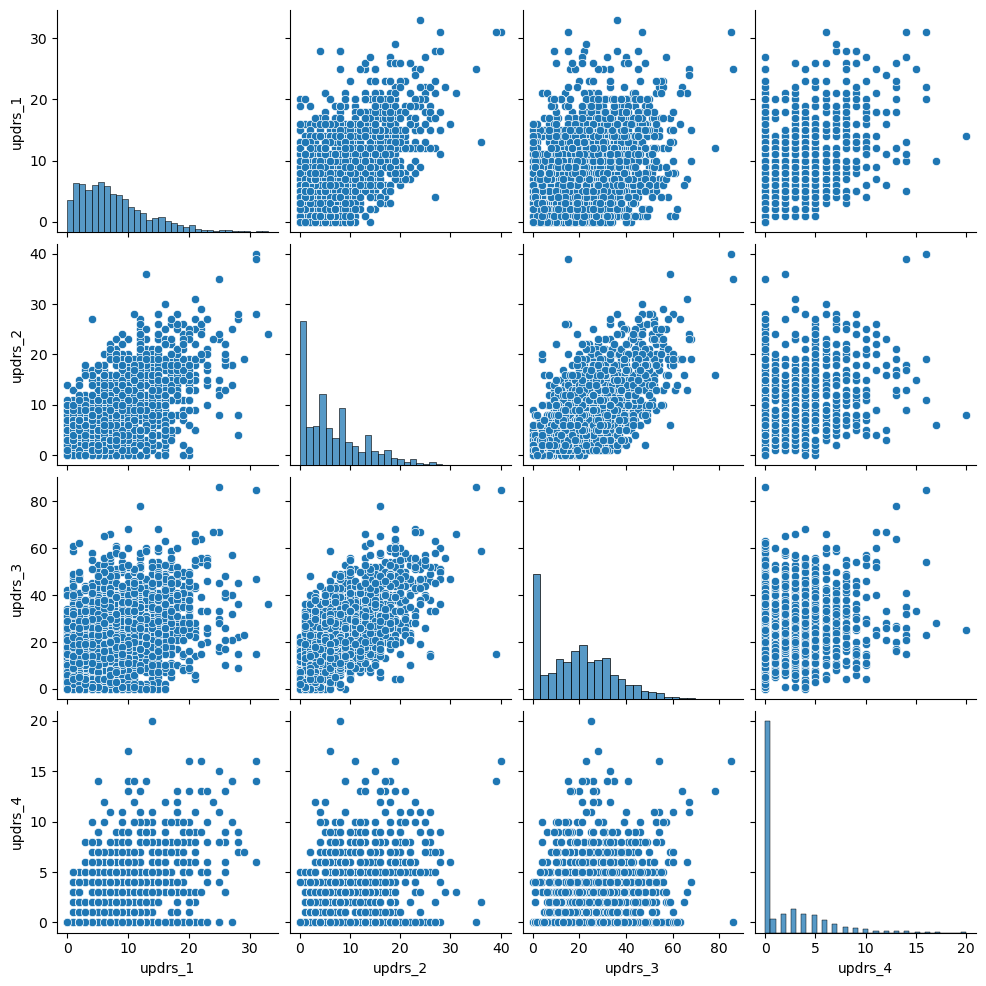

In [90]:
sns.pairplot(train_clinical_data[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']])
